In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
prefix = '/data/kylevigil/'

# Exploration

In this notebook we will look at each category of data and how they corelate to the genre of the movie. To start, I will import the cleaned data table

In [3]:
moviesData = pd.read_pickle(prefix + 'moviesData.pkl')
moviesData.head()

,title,year,rtAudienceNumRatings,rtAudienceScore,titleSentiment,realGenre,genreNum,directorName,directorNum,posterColor,color,colorNum,actorName,actorNum,tagSentiment,countryNum
1,Toy story,1995,102338,81,0.0,Comedy,1,John Lasseter,2027,dark red,"(104.392166836, 54.7272562127, 43.522889115)",5,Tom Hanks,7241,0.356944,66
3,Grumpy Old Men,1993,10489,66,0.1,Romance,5,Donald Petrie,1038,white,"(240.257754103, 245.865108686, 244.831228342)",11,Jack Lemmon,3122,0.100000,66
5,Father of the Bride Part II,1995,13761,64,0.0,Comedy,1,Charles Shyer,609,dark red,"(66.3822844645, 58.6215606039, 44.2912374771)",5,Steve Martin,6881,0.000000,66
6,Heat,1995,42785,92,0.0,Action,0,Michael Mann,2716,light blue,"(148.308032972, 178.875707128, 227.418005495)",6,Al Pacino,120,0.060606,66
7,Sabrina,1954,12812,87,0.0,Romance,5,Billy Wilder,398,black,"(11.6874206517, 10.4756312597, 11.2805579066)",0,Humphrey Bogart,3009,0.000000,66


## Year

Looking at the years you can see some subtle differences between each genre. In the action category for example, the years are more heavily clustered closer to the present day while the horror category is more in the past years.

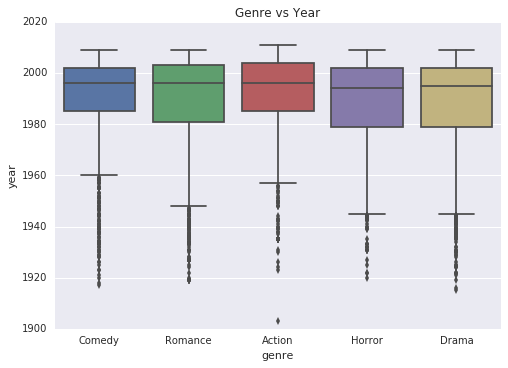

In [4]:
sns.boxplot(moviesData.realGenre, moviesData.year)
plt.title("Genre vs Year")
plt.xlabel('genre')
plt.show()

## Number of Ratings

The number of ratings has one of the most noticeable differences between categories. My theory with this category is that people will tend to want to review different genres of movies more or less than other genres. That is mostly confirmed with action having the most reviews, and drama having the least.

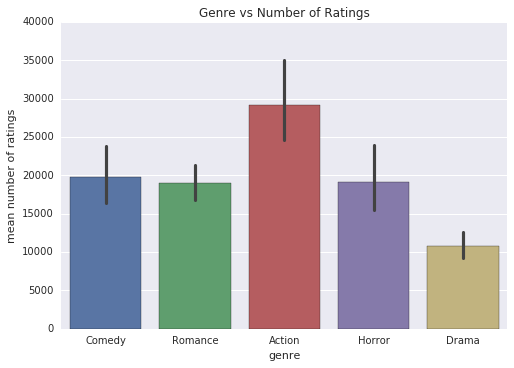

In [5]:
sns.barplot(moviesData.realGenre, moviesData.rtAudienceNumRatings)
plt.title("Genre vs Number of Ratings")
plt.ylabel('mean number of ratings')
plt.xlabel('genre')
plt.show()

## Movie Rating

Like the number of reviews, there is a clear difference between average rating of different genres. Romance and drama tend to get the highest rating while horror gets the lowest. This makes logical sense when thinking about movies, horror movies do tend to be critiqued the most. 

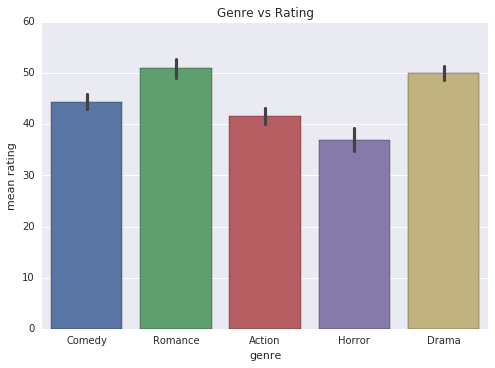

In [6]:
sns.barplot(moviesData.realGenre, moviesData.rtAudienceScore)
plt.title("Genre vs Rating")
plt.ylabel('mean rating')
plt.xlabel('genre')
plt.show()

## Title Sentiment

This section is quite interesting, like I hypothesized, there is a corelation between genre and title sentiment. It makes sense that generally horror movies are going to have negative titles and romance and comedies will have positive ones. The difference between horror and romance is quite satisfying to see.

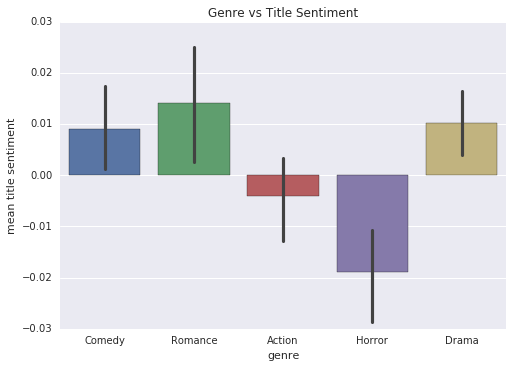

In [7]:
sns.barplot(moviesData.realGenre, moviesData.titleSentiment)
plt.title("Genre vs Title Sentiment")
plt.xlabel('genre')
plt.ylabel('mean title sentiment')
plt.show()

## Director

This section is hard to visualize due to the sheer amount of directors, so I will select the five directors with the most movies made.

In [8]:
moviesData.directorName.value_counts()[:4]

Steven Soderbergh    43
Ingmar Bergman       42
Woody Allen          37
Martin Scorsese      33
dtype: int64

In [9]:
directorsList = list(moviesData.directorName.value_counts()[:4].index)
sample = moviesData[moviesData.directorName.isin(directorsList)]

As you can see a director tends to make movies in the same genre for thier whole career. This will give important data as to which genre the movie is.

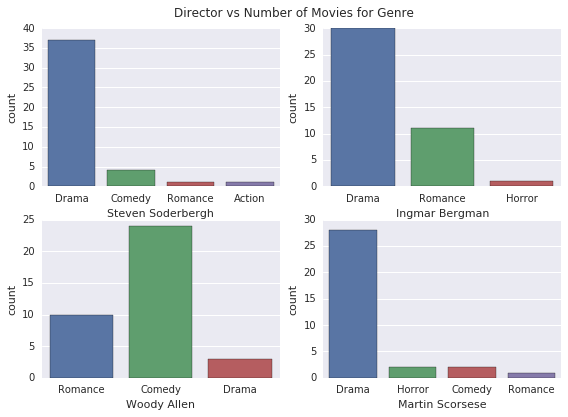

In [10]:
plt.subplots(2,2)
plt.tight_layout()
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.countplot(sample.realGenre[sample.directorName == directorsList[i]])
    plt.xlabel(directorsList[i])
    
plt.suptitle('Director vs Number of Movies for Genre', y = 1.01)
plt.show()

# Poster Color

This is the section I have been looking forward to the most. I hope that there is a clear difference in colors between the different genres

In [11]:
counts = moviesData.groupby(['realGenre', 'posterColor']).size()

As expected, the horror genre has proportionally more black poster, while romance has more white and other colors than black.

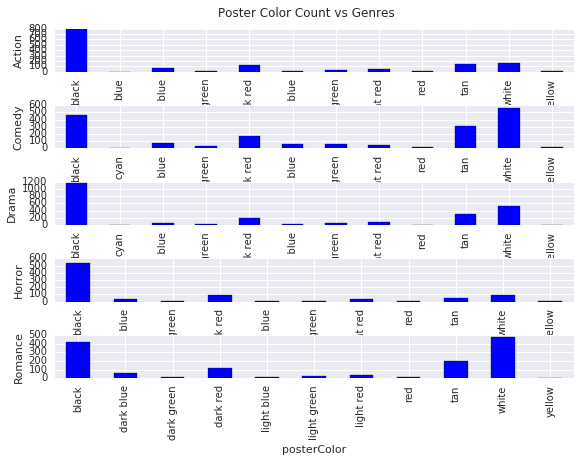

In [12]:
plt.subplots(5,1)
plt.tight_layout()
count = 0
for i in counts.index.get_level_values(0).unique():
    count += 1
    plt.subplot(5,1,count)
    plt.ylabel(i)
    counts[i].plot(kind = 'bar')

plt.suptitle('Poster Color Count vs Genres', y = 1.01)
plt.show()

In [13]:
def return_mean(x):
    """ Given a list of tuples of colors, returns the mean color"""
    meanR = 0
    meanG = 0
    meanB = 0
    for i in x:
        r,g,b = i
        meanR += r;
        meanG += g;
        meanB += b;
    return (meanR/len(x), meanG/len(x), meanB/len(x))

In [14]:
def graph_color(c):
    """ graphs the most popular color from an image as a square """
    plt.figure(figsize=(2,2))
    (r,g,b) = c
    c = (r/255, g/255, b/255)
    plt.plot([0,0], lw=400, color = c)
    plt.axis('off')
    plt.show()

In [15]:
meanColors = moviesData.groupby('realGenre')['color'].agg(return_mean)

Even though the mean colors are just shades of gray you can clearly see the difference in lightness between the different genres with horror of course being the darkest. Romance maybe even has a hint of red/pink or I'm just seeing things.

Action


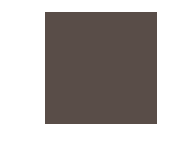

Comedy


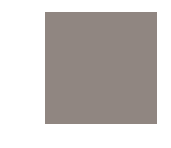

Drama


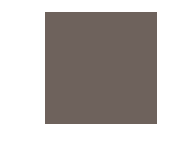

Horror


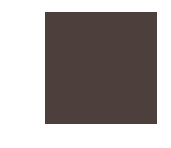

Romance


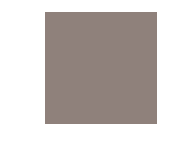

In [16]:
for c in meanColors.index:
    print(c)
    graph_color(meanColors[c])

## Actors

I will visualize this the same way as the directors. You'll be able to see here that the actors tend to work on movies of the the same genre.

In [17]:
moviesData.actorName.value_counts()[:4]

Robert De Niro    33
Clint Eastwood    30
Tom Hanks         27
Nicolas Cage      27
dtype: int64

In [18]:
actorsList = list(moviesData.actorName.value_counts()[:4].index)
sample = moviesData[moviesData.actorName.isin(actorsList)]

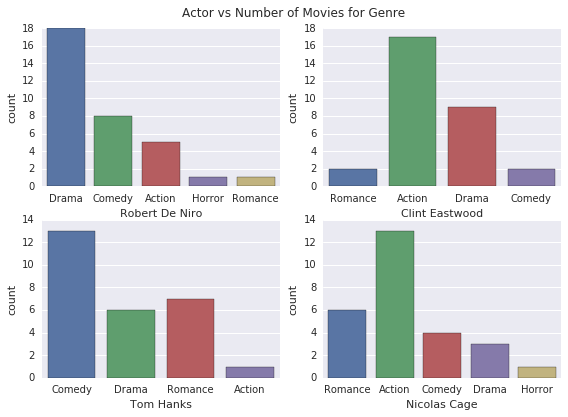

In [19]:
plt.subplots(2,2)
plt.tight_layout()
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.countplot(sample.realGenre[sample.actorName == actorsList[i]])
    plt.xlabel(actorsList[i])
    
plt.suptitle('Actor vs Number of Movies for Genre', y = 1.01)
plt.show()

## Tag Sentiment

Like the title sentiment the tag sentiment should be vastly different for the horror genre as that would tend to give more negative sentiment.

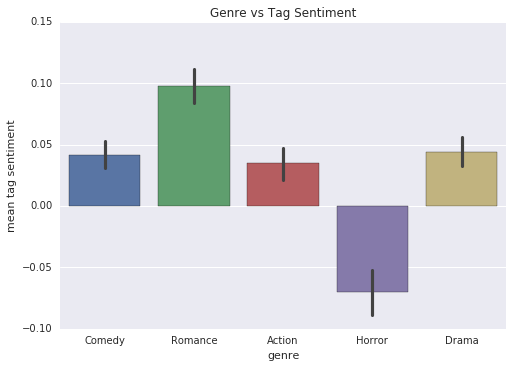

In [20]:
sns.barplot(moviesData.realGenre, moviesData.tagSentiment)
plt.title("Genre vs Tag Sentiment")
plt.xlabel('genre')
plt.ylabel('mean tag sentiment')
plt.show()